 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [160]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [161]:
# Reading whale returns

whale_returns_csv = Path("../Instructions/Starter_Code/Resources/whale_returns.csv")
whale = pd.read_csv(whale_returns_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [162]:
# Count nulls

whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [163]:
# Drop nulls

whale.dropna(inplace = True)
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [164]:
# Reading algorithmic returns

algo_csv = Path("../Instructions/Starter_Code/Resources/algo_returns.csv")
algo = pd.read_csv(algo_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)
algo

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [165]:
# Count nulls

algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [166]:
# Drop nulls

algo.dropna(inplace = True)
algo.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [167]:
# Reading S&P 500 Closing Prices

sp500_csv = Path("../Instructions/Starter_Code/Resources/sp500_history.csv")
sp500 = pd.read_csv(sp500_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)
sp500.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [168]:
# Check Data Types

sp500.dtypes

Close    object
dtype: object

In [169]:
# Fix Data Types

sp500["Close"] = sp500["Close"].str.replace("$", "").astype(float)
sp500.dtypes

Close    float64
dtype: object

In [170]:
# Calculate Daily Returns

sp500_pct = sp500.pct_change().dropna()
sp500_pct.sort_index(inplace = True)
sp500_pct.head()

,Close
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469


In [171]:
# Drop nulls

sp500_pct.dropna(inplace = True)
sp500_pct.tail()

,Close
Date,
2019-04-15,-0.000509
2019-04-16,0.002279
2019-04-17,-0.001577
2019-04-18,-0.001011
2019-04-22,-0.008764


In [172]:
# Rename Column

sp500_pct.columns = ["S&P 500"]
sp500_pct.head()

,S&P 500
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469


## Combine Whale, Algorithmic, and S&P 500 Returns

In [173]:
# Concatenate all DataFrames into a single DataFrame

combined_df = pd.concat([whale, algo, sp500_pct], axis = "columns", join = "inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

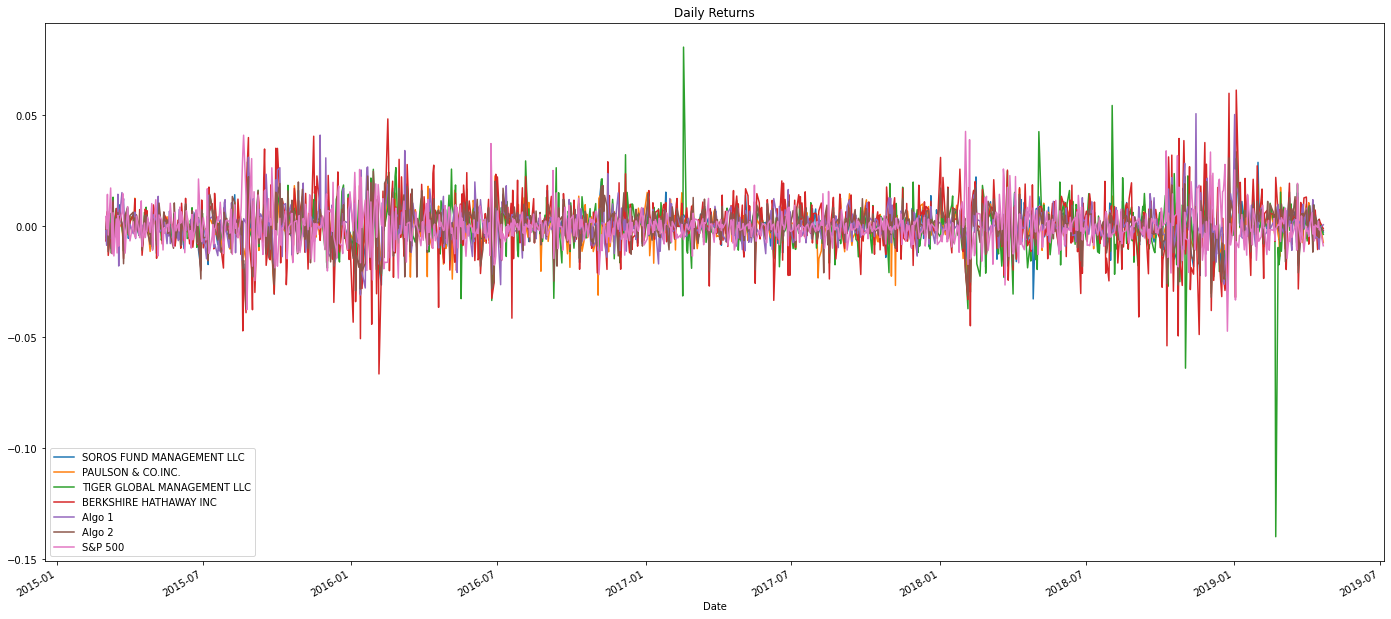

In [174]:
# Plot daily returns

combined_df.plot(title = "Daily Returns", figsize = (24,11))

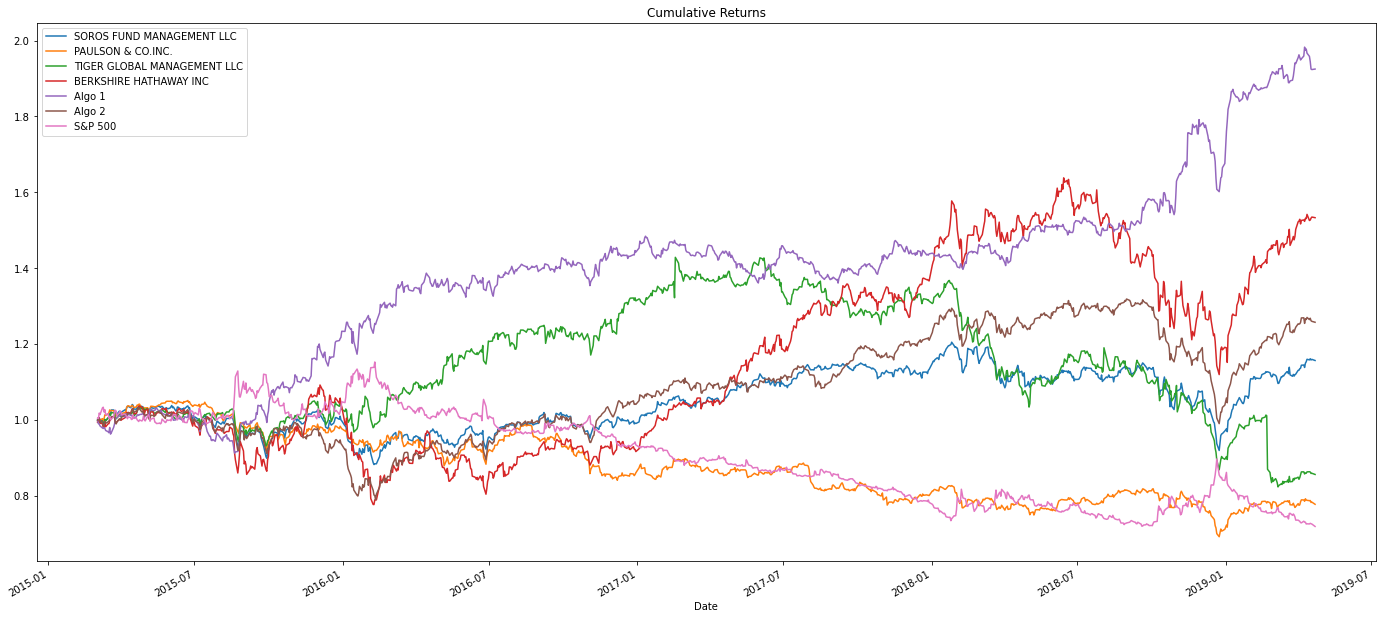

In [175]:
# Plot cumulative returns

returns = (combined_df + 1).cumprod()
returns.plot(title = "Cumulative Returns", figsize = (24,11))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
    * Tiger Global Management LLC and Berkshire Hathaway Inc. are portfolios that carry more risk than the S&P 500.
5. Calculate the Annualized Standard Deviation

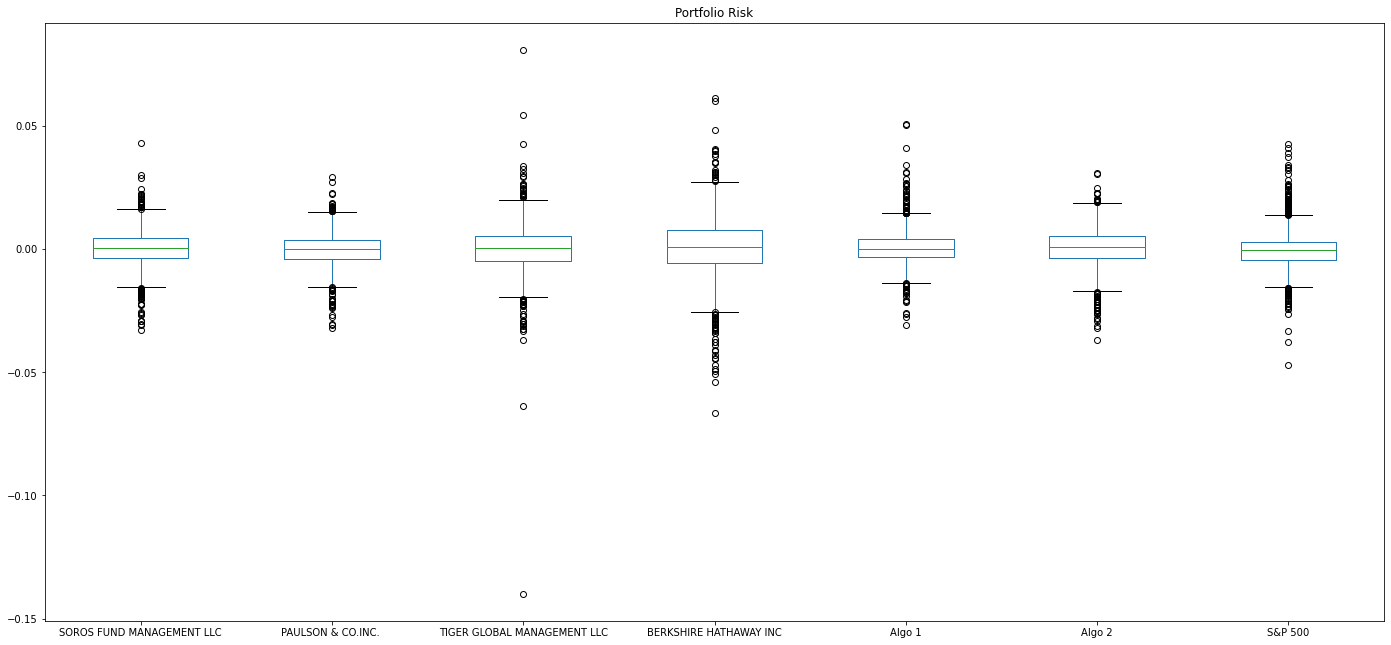

In [176]:
# Box plot to visually show risk

combined_df.plot.box(figsize = (24,11), title = "Portfolio Risk")

In [180]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
    # Tiger Global Managment LLC and Berkshire Hathaway Inc are riskier than the S&P 500.

portfolio_std = combined_df.std()
portfolio_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [181]:
# Determine which portfolios are riskier than the S&P 500

for portfolio in portfolio_std.index:
    if portfolio_std[portfolio] > portfolio_std["S&P 500"]:
        print(portfolio + " is RISKIER than the S&P 500." + "\n")
    else:
        print(portfolio + " is NOT RISKIER than the S&P 500." + "\n")

SOROS FUND MANAGEMENT LLC is NOT RISKIER than the S&P 500.

PAULSON & CO.INC.  is NOT RISKIER than the S&P 500.

TIGER GLOBAL MANAGEMENT LLC is RISKIER than the S&P 500.

BERKSHIRE HATHAWAY INC is RISKIER than the S&P 500.

Algo 1 is NOT RISKIER than the S&P 500.

Algo 2 is NOT RISKIER than the S&P 500.

S&P 500 is NOT RISKIER than the S&P 500.



In [182]:
# Calculate the annualized standard deviation (252 trading days)

vol = portfolio_std * np.sqrt(252)
vol

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
    * Yes, whenever the S&P peaks, the other portfolios peak as well.
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
    * Paulson & CO.Inc. closley mimics the S&P out of all the portfolios.
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
    * Algorithm 1's portfolio is not as sensitive to the S&P. It's beta range is betwee 1 and -1. If the beta exceed 1 or -1, that would indicate a higher sensitivity to the S&P.
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.
    * From the exponentially weighted moving average, we can conclude that Tiger Global Management LLC and Berkshire Hathaway Inc. have high sensitivity to the S&P. 

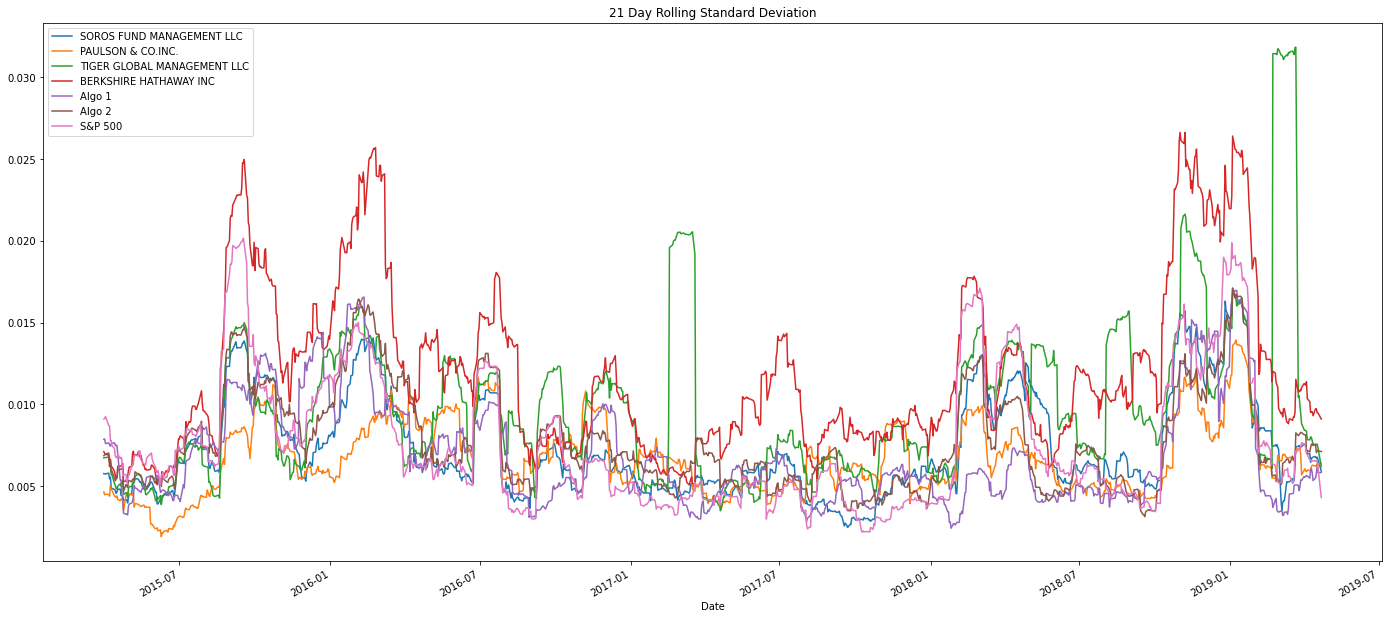

In [183]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window

combined_df.rolling(window = 21).std().plot(figsize = (24,11), title = "21 Day Rolling Standard Deviation")

In [185]:
# Construct a correlation table

correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


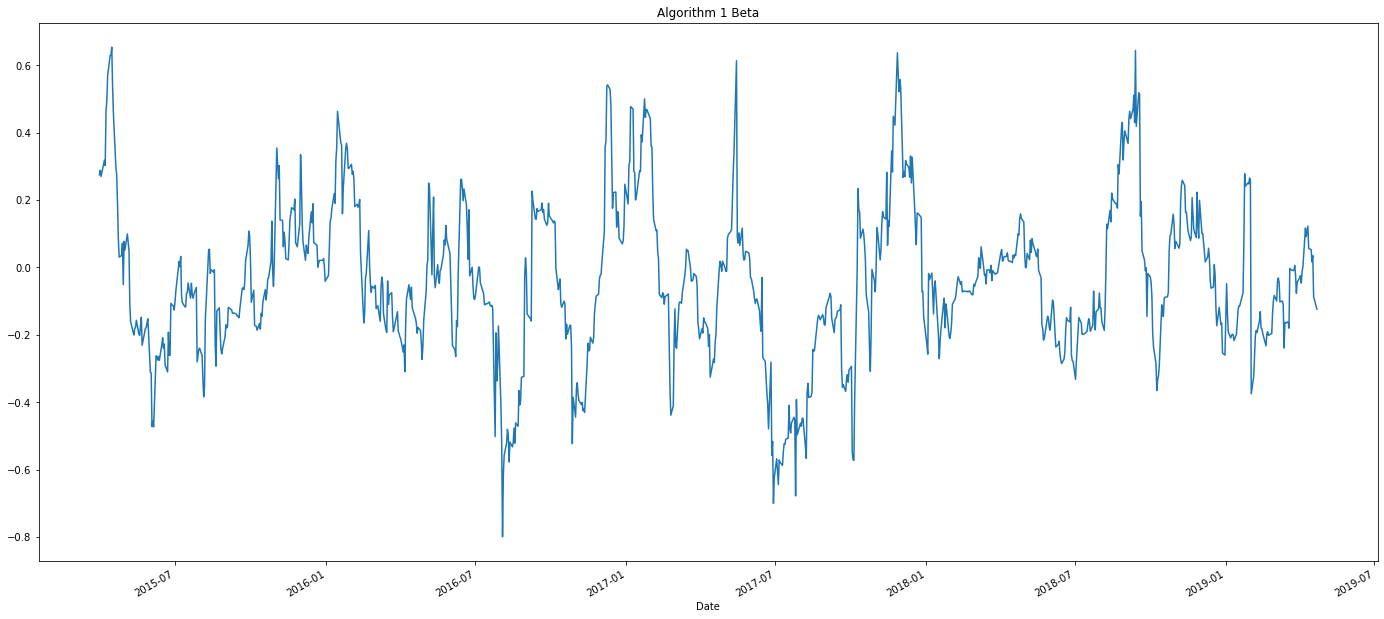

In [186]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)

covariance = combined_df["Algo 1"].rolling(window = 21).cov(combined_df["S&P 500"])
variance = combined_df["S&P 500"].rolling(window = 21).var()
beta = covariance/variance
beta.plot(title = "Algorithm 1 Beta", figsize = (24,11))

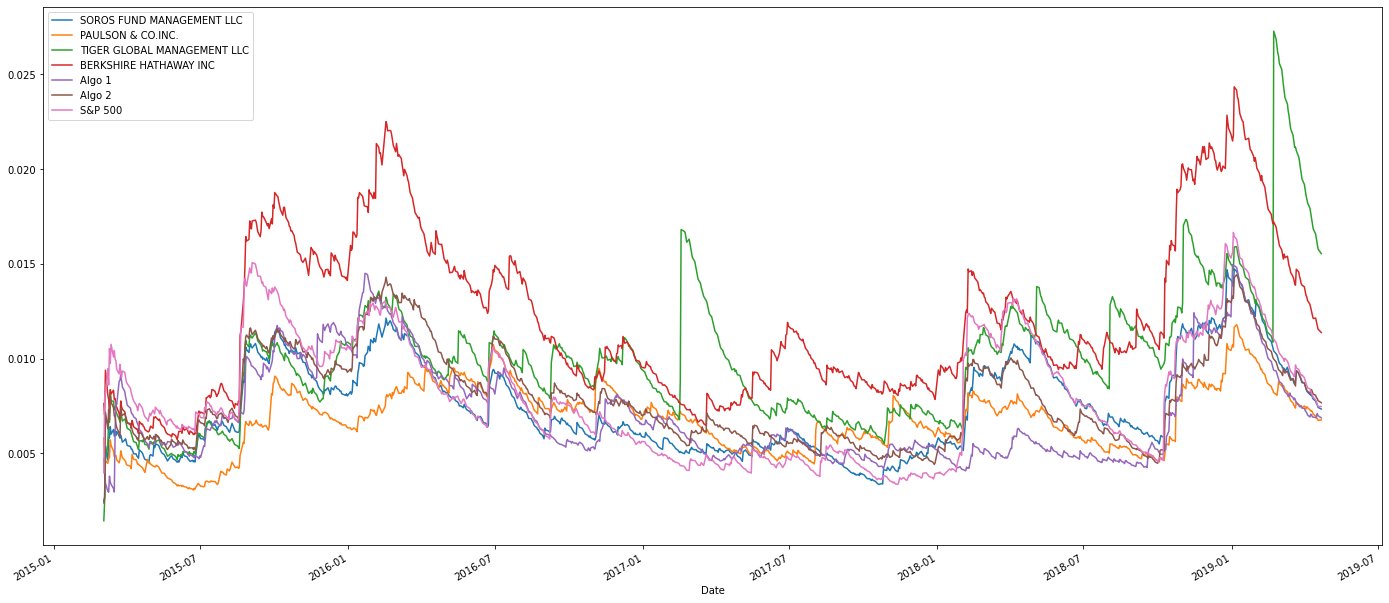

In [187]:
# Calculate a rolling window using the exponentially weighted moving average. 

combined_df.ewm(halflife=21).std().plot(figsize=(24,11))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [188]:
# Calculate annualized Sharpe Ratios

sharpe = ((combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252)))
sharpe

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

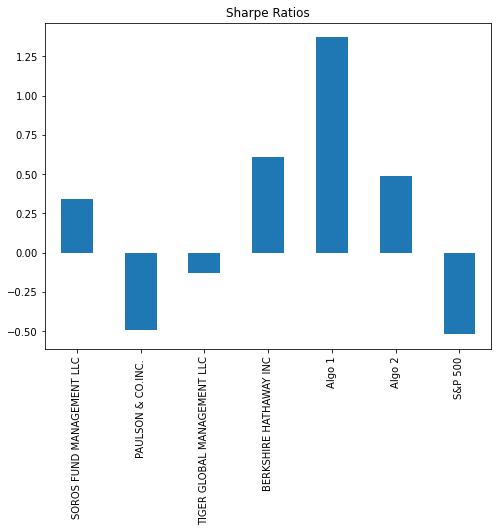

In [189]:
# Visualize the sharpe ratios as a bar plot

sharpe.plot.bar(title = "Sharpe Ratios", figsize = (8,6))

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

--- Algorithm 1 outperformed all the whales. Algorithm 2 was close to out performing all the whales, however it came up short against Berkshire Hathaway Inc. I would recommend investing with Algorithm 1.

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [190]:
# Read the first stock

amzn_csv = Path("Resources/amzn_ticker.csv")
amzn_df = pd.read_csv(amzn_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
amzn_df.sort_index(inplace = True)
amzn_df.head()

,Close,Stock
Date,,
2017-01-03,753.67,AMZN
2017-01-04,757.18,AMZN
2017-01-05,780.45,AMZN
2017-01-06,795.99,AMZN
2017-01-09,796.92,AMZN


In [191]:
# Read the second stock

bp_csv = Path("Resources/bp_ticker.csv")
bp_df = pd.read_csv(bp_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
bp_df.sort_index(inplace = True)
bp_df.head()

,Close,Stock
Date,,
2017-01-03,38.00,BP
2017-01-04,38.29,BP
2017-01-05,38.57,BP
2017-01-06,37.91,BP
2017-01-09,37.31,BP


In [192]:
# Read the third stock

dis_csv = Path("Resources/dis_ticker.csv")
dis_df = pd.read_csv(dis_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
dis_df.sort_index(inplace = True)
dis_df.head()

,Close,Stock
Date,,
2017-01-03,106.08,DIS
2017-01-04,107.44,DIS
2017-01-05,107.38,DIS
2017-01-06,108.98,DIS
2017-01-09,108.36,DIS


In [193]:
# Read the fourth stock

nke_csv = Path("Resources/nke_ticker.csv")
nke_df = pd.read_csv(nke_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)
nke_df.sort_index(inplace = True)
nke_df.head()

,Close,Stock
Date,,
2017-01-03,51.98,NKE
2017-01-04,53.07,NKE
2017-01-05,53.06,NKE
2017-01-06,53.91,NKE
2017-01-09,53.38,NKE


In [194]:
# Concatenate all stocks into a single DataFrame

my_portfolio = pd.concat([amzn_df, bp_df, dis_df, nke_df], axis = "rows", join = "inner")
my_portfolio

,Close,Stock
Date,,
2017-01-03,753.67,AMZN
2017-01-04,757.18,AMZN
2017-01-05,780.45,AMZN
2017-01-06,795.99,AMZN
2017-01-09,796.92,AMZN
...,...,...
2019-12-23,100.04,NKE
2019-12-24,100.14,NKE
2019-12-26,100.71,NKE


In [195]:
# Reset the index

my_portfolio.reset_index()

,Date,Close,Stock
0,2017-01-03,753.67,AMZN
1,2017-01-04,757.18,AMZN
2,2017-01-05,780.45,AMZN
3,2017-01-06,795.99,AMZN
4,2017-01-09,796.92,AMZN
...,...,...,...
3007,2019-12-23,100.04,NKE
3008,2019-12-24,100.14,NKE
3009,2019-12-26,100.71,NKE
3010,2019-12-27,101.57,NKE


In [196]:
# Pivot so that each column of prices represents a unique symbol

my_portfolio = my_portfolio.pivot_table(values = "Close", index = "Date", columns = "Stock")
my_portfolio

Stock,AMZN,BP,DIS,NKE
Date,,,,
2017-01-03,753.67,38.00,106.08,51.98
2017-01-04,757.18,38.29,107.44,53.07
2017-01-05,780.45,38.57,107.38,53.06
2017-01-06,795.99,37.91,108.98,53.91
2017-01-09,796.92,37.31,108.36,53.38
...,...,...,...,...
2019-12-23,1793.00,38.11,144.68,100.04
2019-12-24,1789.21,38.04,145.29,100.14
2019-12-26,1868.77,37.98,145.70,100.71


In [197]:
# Drop Nulls
my_portfolio.dropna(inplace = True)
my_portfolio

Stock,AMZN,BP,DIS,NKE
Date,,,,
2017-01-03,753.67,38.00,106.08,51.98
2017-01-04,757.18,38.29,107.44,53.07
2017-01-05,780.45,38.57,107.38,53.06
2017-01-06,795.99,37.91,108.98,53.91
2017-01-09,796.92,37.31,108.36,53.38
...,...,...,...,...
2019-12-23,1793.00,38.11,144.68,100.04
2019-12-24,1789.21,38.04,145.29,100.14
2019-12-26,1868.77,37.98,145.70,100.71


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [198]:
# Calculate weighted portfolio returns

my_portfolio_returns = my_portfolio.pct_change().dropna()
weights = [.25, .25, .25, .25]
my_returns = my_portfolio_returns.dot(weights)
my_returns


Date
2017-01-04    0.011520
2017-01-05    0.009325
2017-01-06    0.008430
2017-01-09   -0.007545
2017-01-10   -0.002878
                ...   
2019-12-23   -0.000918
2019-12-24    0.000316
2019-12-26    0.012851
2019-12-27    0.001569
2019-12-30   -0.010071
Length: 752, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [199]:
# Add your "Custom" portfolio to the larger dataframe of fund returns

new = pd.concat([combined_df, my_returns], axis = "columns", join = "inner")
new.rename(columns = {0: "The Best"},inplace = True )
new

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,The Best
Date,,,,,,,,
2017-01-04,0.011581,0.007029,-0.001011,0.012204,0.012510,0.014701,0.000771,0.011520
2017-01-05,0.003079,0.004107,-0.004264,0.016092,-0.003955,-0.001872,-0.003505,0.009325
2017-01-06,0.003561,-0.013250,-0.001213,0.005667,-0.000364,0.000051,0.003561,0.008430
2017-01-09,-0.000458,0.002007,-0.004540,-0.002642,0.002775,-0.006277,0.000000,-0.007545
2017-01-10,-0.001490,0.000394,-0.000718,0.010586,0.007669,0.006618,-0.002822,-0.002878
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.005762
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000140
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.007234


In [200]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

new.dropna(inplace = True)
new.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,The Best
Date,,,,,,,,
2017-01-04,0.011581,0.007029,-0.001011,0.012204,0.012510,0.014701,0.000771,0.011520
2017-01-05,0.003079,0.004107,-0.004264,0.016092,-0.003955,-0.001872,-0.003505,0.009325
2017-01-06,0.003561,-0.013250,-0.001213,0.005667,-0.000364,0.000051,0.003561,0.008430
2017-01-09,-0.000458,0.002007,-0.004540,-0.002642,0.002775,-0.006277,0.000000,-0.007545
2017-01-10,-0.001490,0.000394,-0.000718,0.010586,0.007669,0.006618,-0.002822,-0.002878


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [201]:
# Risk

vol_new = new.std() * np.sqrt(252)
vol_new

SOROS FUND MANAGEMENT LLC      0.124821
PAULSON & CO.INC.              0.107798
TIGER GLOBAL MANAGEMENT LLC    0.188752
BERKSHIRE HATHAWAY INC         0.198374
Algo 1                         0.106747
Algo 2                         0.120116
S&P 500                        0.129789
The Best                       0.159731
dtype: float64

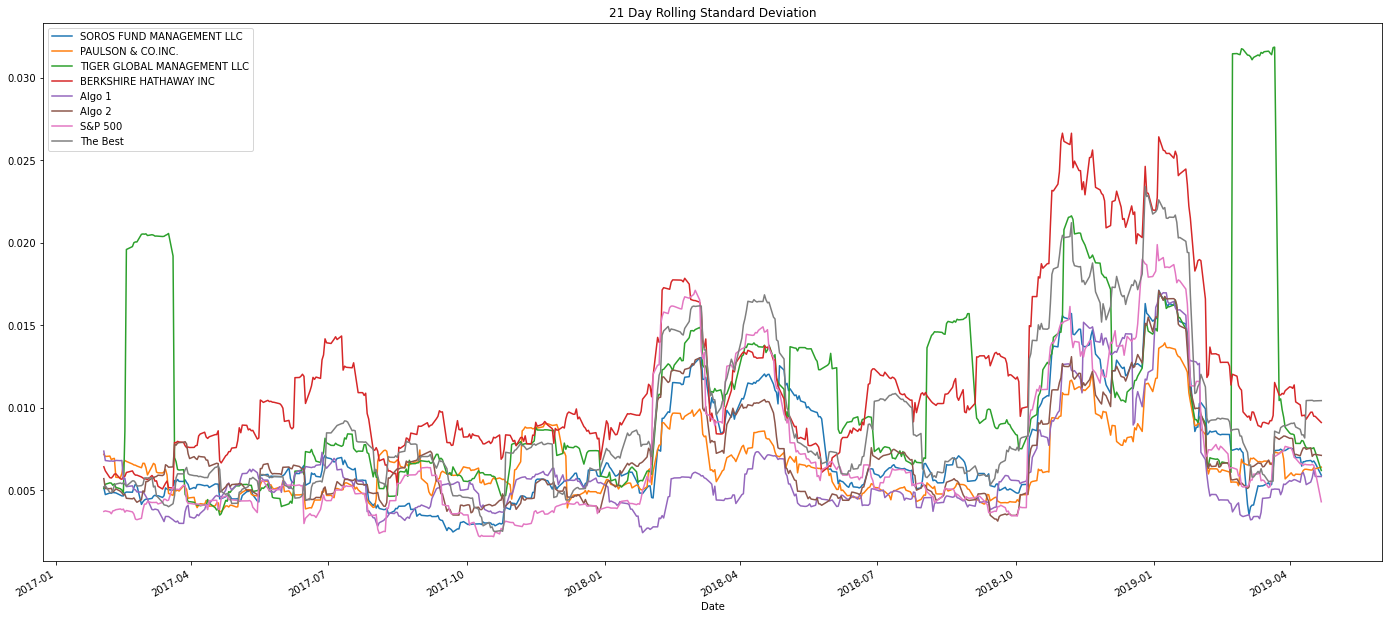

In [202]:
# Rolling

new.rolling(window = 21).std().plot(title = "21 Day Rolling Standard Deviation", figsize = (24,11))

In [203]:
# Annualized Sharpe Ratios

sharpe_new = ((new.mean() * 252) / (new.std() * np.sqrt(252)))
sharpe_new

SOROS FUND MANAGEMENT LLC      0.590634
PAULSON & CO.INC.             -0.419090
TIGER GLOBAL MANAGEMENT LLC   -0.904169
BERKSHIRE HATHAWAY INC         1.215596
Algo 1                         1.204568
Algo 2                         0.714065
S&P 500                       -0.797175
The Best                       1.420566
dtype: float64

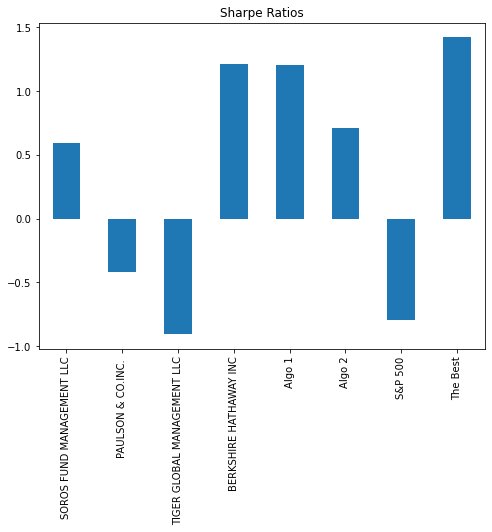

In [204]:
# Visualize the sharpe ratios as a bar plot

sharpe_new.plot.bar(figsize = (8,6), title = "Sharpe Ratios")

In [205]:
# Create a correlation analysis

correlation_new = new.corr()
correlation_new

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,The Best
SOROS FUND MANAGEMENT LLC,1.000000,0.685890,0.485357,0.760774,0.278541,0.796821,0.020061,0.714457
PAULSON & CO.INC.,0.685890,1.000000,0.419035,0.564935,0.284569,0.718742,-0.010575,0.597087
TIGER GLOBAL MANAGEMENT LLC,0.485357,0.419035,1.000000,0.344180,0.089557,0.429649,-0.020208,0.404711
BERKSHIRE HATHAWAY INC,0.760774,0.564935,0.344180,1.000000,0.239892,0.737123,-0.015891,0.734827
Algo 1,0.278541,0.284569,0.089557,0.239892,1.000000,0.295105,-0.052762,0.275195
Algo 2,0.796821,0.718742,0.429649,0.737123,0.295105,1.000000,-0.004471,0.736908
S&P 500,0.020061,-0.010575,-0.020208,-0.015891,-0.052762,-0.004471,1.000000,0.069611
The Best,0.714457,0.597087,0.404711,0.734827,0.275195,0.736908,0.069611,1.000000


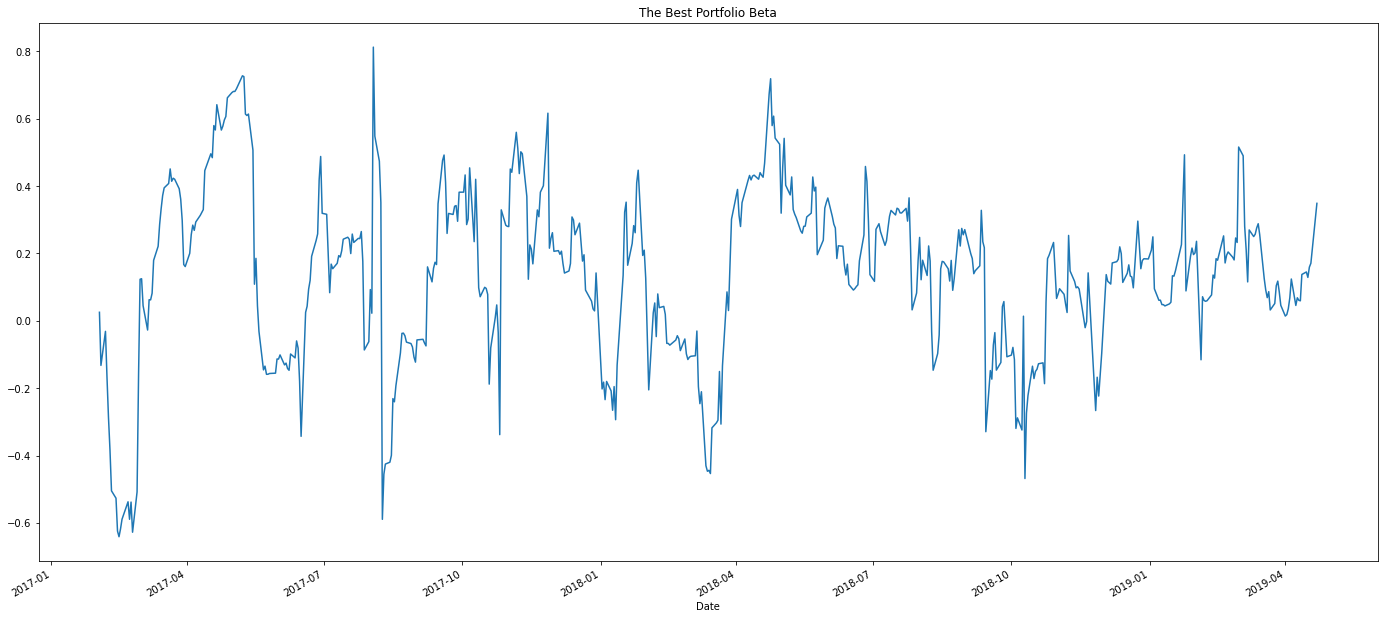

In [207]:
# Beta

covariance_new = new["The Best"].rolling(window = 21).cov(new["S&P 500"])
variance_new = new["S&P 500"].rolling(window = 21).var()
beta_new = covariance_new / variance_new
beta_new.plot(title = "The Best Portfolio Beta", figsize = (24,11))